## Quiz #0701

### "TensorFlow machine learning with Calilfornia housing data"

In [118]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
import seaborn as sns
warnings.filterwarnings('ignore')    # Turn the warnings off.

#### Answer the following question by providing Python code:

In [119]:
# Bring the data.
housing_data = fetch_california_housing()

In [120]:
# Read the description.
print(housing_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

1). Explore the data:
- Display the dataset as a DataFrame with column labels.

In [121]:
print(housing_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [122]:
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [123]:
df['MedHouseValue'] = housing_data.target
df['MedHouseValue']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseValue, Length: 20640, dtype: float64

2). Build a machine learning model with TensorFlow. 
- Preprocess the data if necessary.
- Build a linear regression model.
- Train the model.
- Calculate the error metrics such as MSE and RMSE (in-sample and out-of-sample). Target: RMSE < 1.

In [124]:
df.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec8c0d0550>,
      dtype=object)

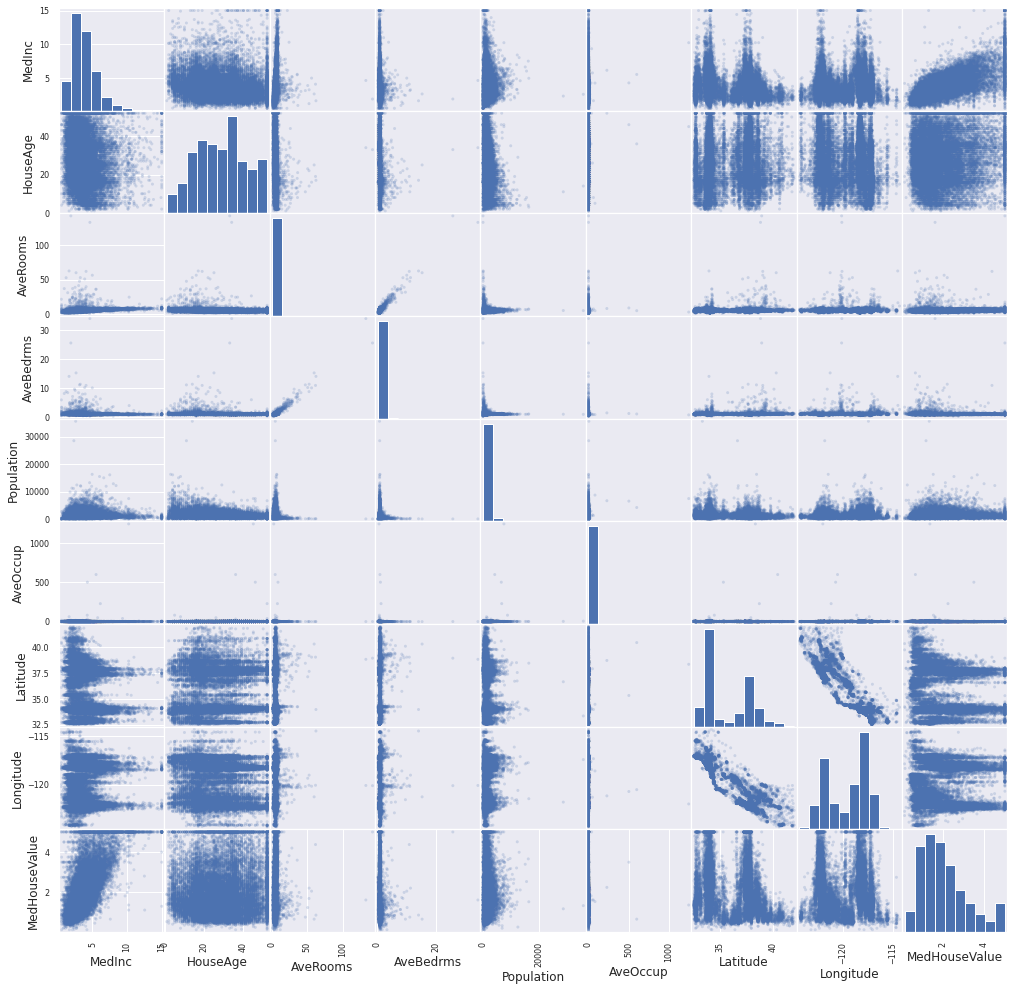

In [125]:
c = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(17, 17), diagonal='hist')
c

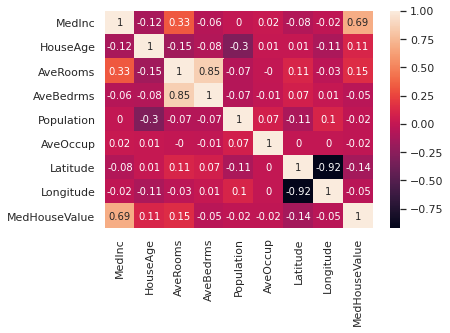

In [126]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

##Building a linear regression model.

In [127]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

##Variables and Placeholders:

In [128]:
b1 = tf.Variable(1.0)                
b0 = tf.Variable(1.0)  

In [103]:
X_ph = tf.placeholder(tf.float32, name='x')  
y_ph = tf.placeholder(tf.float32, name='y')

In [129]:
y_model = b1 * X_ph + b0

##loss function and the optimization method:

In [130]:
loss = tf.reduce_mean(tf.square(y_ph - y_model))          

In [131]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

##Training and Testing:

In [132]:
X = df['MedInc']
y = df['MedHouseValue']

In [114]:
n_epochs = 100                                        # N# of epochs (gradient descent steps).
train = optimizer.minimize(loss)                                          # Define training. Use optimizer.minimize(loss)
init = tf.global_variables_initializer()                                           # Define Variable initialization.
                                                      #Returns an Op that initializes global variablestf.global_variables_initializer().



with tf.Session() as sess:
        # Variables initialization.
        sess.run(init)       
        # Training.
        my_feed = {X_ph:X, y_ph:y}        #************** write your code here****************####                # Prepare feed data as a dictionary. 
        
        for i in range(n_epochs):
                 
            sess.run(train, feed_dict = my_feed)
        b0_model, b1_model = sess.run([b0, b1])                   # Get the final values of the Variables.
        # Testing.
        
        mse_value = sess.run(loss, feed_dict = my_feed)            # Cal

In [133]:
print("Parameters b0 = {:5.3f} , b1 = {:5.3f}".format(b0_model, b1_model))

Parameters b0 = 0.847 , b1 = 0.348


In [134]:
print("MSE  = {:5.3f}".format(mse_value))
print("RMSE = {:5.3f}".format(np.sqrt(mse_value)))

MSE  = 0.735
RMSE = 0.857
